# <span style="color: rgb(255, 0, 128)">Pattern Python library</span>

### Name: Devi Sandeep

**Pattern** is an useful Python package for data retrieval tasks, text analysis, machine learning and network analysis. It is an easy-to-use mash-up of tools often used for data mining, which usually requires several independent libraries included together to get an end-product. Pattern is well documented with many examples, unit tests and has tools for the following functionalities:

* <span style="color:blue">**Data Mining:**</span> web services (Google, Bing, Twitter, Wikipedia), web crawler, HTML DOM parser
* <span style="color:blue">**Natural Language Processing:**</span> part-of-speech taggers, n-gram search, sentiment analysis
* <span style="color:blue">**Machine Learning:**</span> vector space model, clustering, classification (KNN, SVM, Perceptron)
* <span style="color:blue">**Network Analysis:**</span> graph visualization.

As part of this notebook, we will cover some of these applications. We will mainly focus on pattern.web which contains API's to scrape the web and patter.vector module which contains machine learning tools for vector space model and algorithms for clustering and classification (Naive Bayes, k-NN, Perceptron, SVM).

## <span style="color: rgb(255, 0, 128)">Installing the library</span>

-----

Pattern requires Python 2.5+ on Windows, Linux or Mac. This library can be automatically downloaded and installed using the pip command below:

In [ ]:
pip install pattern

Next, we will see the list of all the modules that Pattern support.

## <span style="color: rgb(255, 0, 128)">Modules</span>

-----

Pattern is organized into separate modules for each of the functionality mentioned above. Specifically, for data mining tasks Pattern has pattern.web module and for Machine Learning tasks, there is pattern.vector module. 

| Module | Functionality |
| :--- | --- |
| pattern.web | web toolkit, web crawler, HTML DOM parser.|
| pattern.db | Wrappers for databases (MySQL, SQLite) and CSV-files.|
| pattern.text | Natural Language Processing (NLP) toolkit|
| pattern.search | Search algorithm to retrieve n-grams from tagged text|
| pattern.vector | Machine learning tool-kit; has modules for vector space model, clustering, classification.|
| pattern.graph | Toolkit for Graph analysis & visualization.|

## <span style="color: rgb(255, 0, 128)">Pattern library for data mining tasks</span>

Let's look at pattern.web module used for data mining tasks:

## pattern.web

-----

The pattern.web module is a web toolkit that contains API's (Google, Bing, Twitter, Facebook, Wikipedia, Flickr etc), a HTML DOM parser and a web crawler.

This module in the Pattern library is used for data mining tasks. It can be used to open a web page, retrieve/download the page content, read the web page. It can query different web services and get results. This can also be used to iterate over the wikipedia articles, get the Facebook post comments and likes, search through the atom news feed and so on.

### Accessing web pages

First, lets see how to download the page content. The `download` method in pattern.web URL class returns the retrieved data in the form of HTML. However, for further processing of the text, for instance, sentiment analysis, you will need cleaner data without HTML tags. To achieve this, you can process the data with the `plaintext` method.

In [1]:
from pattern.web import URL, plaintext

# This downloads the HTML content
html = URL('http://courses.cse.tamu.edu/caverlee/csce670/', unicode = True).download()

# plaintext cleans the content by removing the html tags 
plaintext(html.decode('utf-8'))

'CSCE 670 :: Information Storage and Retrieval :: Spring 2020\n\nCSCE 670 :: Information Storage and Retrieval :: Spring 2020\n\nMWF 11:30am-12:20pm in ZACH 310\n\nInstructor: James Caverlee,\n\nHRBB 403 Office Hours: 3-4pm on Monday and Tuesday, or by appointment Department of Computer Science and\n\nEngineering Texas A&M\n\nUniversity\n\nTA: Yun He, HRBB 408D Office Hours: 4-5pm on Thursday and Friday, or by appointment\nCourse Schedule :: Spotlight :: Project\nCourse Summary\n\nWhat is this course about?\n* One of the classic IR textbooks says that "Information retrieval (IR) is finding material (usually documents) of an unstructured nature (usually text) that satisfies an information need from within large collections (usually stored on computers)."* Gerard Salton "the father of Information Retrieval" said that "Information retrieval is a field concerned with the structure, analysis, organization, storage, searching, and retrieval of information."* More recently, Markov and de Rijk

This module can query different web services and get results. It has APIs to query Google, Bing, Facebook, Flickr etc.
`search` function works similar to search field in web browser. 

You can download files from the web pages. For example, images can be downloaded by the following `search` and `download` code below. Let's query "Karen Sparck Jones" on Flickr and get the most relevant picture.

Download: https://live.staticflickr.com/7391/15962398483_40dee1d04d_m.jpg
Saved as: karen_sparck_jones.png


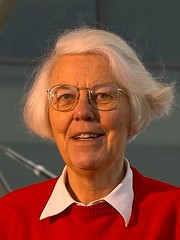

In [2]:
from pattern.web import Flickr, RELEVANCY, SMALL
from IPython.display import Image

SearchEngine = Flickr(license = None)

# Searches 'Karen Sparck Jones' in Flickr
query = "karen sparck jones"
results = SearchEngine.search(query, size = SMALL, sort = RELEVANCY, cached = False)
image = results[0]

# Downloads the image and saves in the local workspace
data = image.download()
path = query.replace(" ", "_") + ".png"
f = open(path, "wb")
f.write(data)
f.close()

print("Download: %s" % image.url)
print("Saved as: %s" % path)

# Display the saved image
Image(path)

### Getting Search Engine Results

The pattern library contains SearchEngine class which is derived by the classes that can be used to connect to call API's of different search engines and websites such as Google, Bing, Facebook, Wikipedia, Twitter, etc. The search query returns objects for each item. The result object can then be used to retrieve the information about the searched result. The attributes of the result object are url, title, text, language, author, date.

Now let's see a very simple example of how we can search something on Wikipedia via pattern library. Let's find out the major conferences in Information Retrieval by data mining through Pattern library.

Search for "information retrieval" in Wikipedia and get all the subsections in the wiki article.

In [3]:
from pattern.web import Wikipedia

article = Wikipedia().search('information retrieval')

# Retrieves all the sections in the Wikipedia article "Information Retrieval"
for section in article.sections:
    print(section)

WikipediaSection(title='Information retrieval')
WikipediaSection(title='Overview')
WikipediaSection(title='History')
WikipediaSection(title='Model types')
WikipediaSection(title='First dimension: mathematical basis')
WikipediaSection(title='Second dimension: properties of the model')
WikipediaSection(title='Performance and correctness measures')
WikipediaSection(title='Timeline')
WikipediaSection(title='Major conferences')
WikipediaSection(title='Awards in the field')
WikipediaSection(title='In popular culture')
WikipediaSection(title='See also')
WikipediaSection(title='References')
WikipediaSection(title='Further reading')


We do see a subsection with title 'Major conferences'. Get the content for this subsection to list the conferences. 

In [4]:
for section in article.sections:
    if section.title == 'Major conferences':
        print(section.content)

Major conferences* SIGIR: Conference on Research and Development in Information Retrieval
* ECIR: European Conference on Information Retrieval
* CIKM: Conference on Information and Knowledge Management
* WWW: International World Wide Web Conference
* WSDM: Conference on Web Search and Data Mining
* ICTIR: International Conference on Theory of Information Retrieval


Now that we have already covered downloading web pages, downloading images and working our way through wikipedia articles, let's go forward and retrieve some real-time feed. pattern.web has APIs to connect to Twitter and get the latest tweets which contain the word "neural network".

In [5]:
from pattern.web import Twitter, plaintext

twitter = Twitter(language = 'en')

# Searches for the tweets with the word "neural network"
for tweet in twitter.search('"neural network"', cached = False):
    print(plaintext(tweet.text))
    print("*************************************************************************")

RT @UCLAengineering: UCLA engineers led by @InnovateUCLA have developed a neural network that can work with multiple wavelengths of light simultaneously. The optical system could lead to devices that can recognize objects instantly. Study published in @LightSciAppl https://t.co/nAkSncVaM7 https://t.co/tV0hmo2IcC
*************************************************************************
RT @UCLAengineering: UCLA engineers led by @InnovateUCLA have developed a neural network that can work with multiple wavelengths of light simultaneously. The optical system could lead to devices that can recognize objects instantly. Study published in @LightSciAppl https://t.co/nAkSncVaM7 https://t.co/tV0hmo2IcC
*************************************************************************
UCLA engineers led by @InnovateUCLA have developed a neural network that can work with multiple wavelengths of light simultaneously. The optical system could lead to devices that can recognize objects instantly. Study publis

### HTML Parsing

This module includes an HTML parser that represents HTML source code as a parse tree. The DOM (Document Object Model) class provides an efficient way to traverse the parse tree and retrieve the HTML contents by id, class etc.

Suppose we want to retrieve all the customer reviews of an Amazon product. From the code below, we can download HTML source and search for the review-title and review-rating in the parse tree, we can get the review titles and corresponding ratings

In [6]:
import re
from pattern.web import URL, DOM

url = URL('https://www.amazon.com/product-reviews/0521865719')
src = url.download(unicode = True)
clean = re.compile('<.*?>')
    
print("Ranking\t\tTitle")

# Get the relevant content from the parse tree obtained
for e in DOM(src).by_id('cm_cr-review_list'):
    if e.by_class('review-title'):
        
        # Get title and rating from "review-title" and "a-icon-alt" classes
        title = re.sub(clean, '', e.by_class('review-title')[0].content)
        rating = e.by_class('a-icon-alt')[0].content.split(' ')[0]
        print('{0}\t{1}'.format(rating.strip(), title.strip()))

Ranking		Title
5.0	Nice Introduction Text
5.0	Good for corpus linguists too
5.0	My new favorite book on search
1.0	Not the same as hardcover book!
5.0	Excellent. ("Introduction" should be treated as tongue in cheek ...
5.0	Five Stars
5.0	An excelent buy
4.0	but it is a nice overview and beginning reference
5.0	learn the gory details of IR
5.0	Great Book


### Context based web search

We will wrap up discussing pattern.web with one last interesting application i.e., sorting the Google search results based on context. Here goes a list of movies and we are trying to sort them based on the context "excellent movie"

In [7]:
from pattern.web import sort

results = sort(terms = [
    'Joker', 
    'Parasite', 
    'Casablanca', 
    'Matrix',
    'Titanic', 
    'Dark Knight',
    'Inception'], context = 'excellent movie', prefix = True)

for weight, term in results:
    print("%.2f" % (weight * 100) + '%', term)

70.94% "excellent movie Titanic"
14.35% "excellent movie Inception"
10.77% "excellent movie Joker"
3.87% "excellent movie Parasite"
0.02% "excellent movie Matrix"
0.02% "excellent movie Dark Knight"
0.02% "excellent movie Casablanca"


Looks like <a href="https://www.imdb.com/title/tt0120338/">Titanic</a> is the best movie of all the ones listed

Let's try one more experiment with the terms (movie names) we have. If you would want to rank the terms based on context "Christopher Nolan"

In [8]:
from pattern.web import sort

results = sort(terms = [
    'Joker', 
    'Parasite', 
    'Casablanca', 
    'Matrix',
    'Titanic', 
    'Dark Knight',
    'Inception'], context = 'Christopher Nolan', prefix = True)

for weight, term in results:
    print("%.2f" % (weight * 100) + '%', term)

53.47% "Christopher Nolan Dark Knight"
39.42% "Christopher Nolan Inception"
6.93% "Christopher Nolan Joker"
0.13% "Christopher Nolan Titanic"
0.05% "Christopher Nolan Matrix"
0.01% "Christopher Nolan Casablanca"
0.00% "Christopher Nolan Parasite"


Bingo! Dark Knight and Inception are Christopher Nolan movies.

## <span style="color: rgb(255, 0, 128)">Pattern library for Machine Learning Tasks</span>

For Machine Learning tasks, pattern.vector module is used.

## pattern.vector

-----

The **pattern.vector** module is a toolkit for machine learning, based on Vector Space Model of bag-of-words documents with weighted features (TF-IDF) and distance metrics (Cosine Similarity). Models can be used for clustering (k-means, hierarchical), classification (Naive Bayes, Perceptron, kNN, SVM).

### Stemming and Lemmatization

Stemming is a crude heuristic process that chops off the ends of words in the hope of achieving what “principled”
lemmatization attempts to do with a lot of linguistic knowledge. `stem` function in pattern.vector can be used to find the stemmed word. Porter algorithm is the most common stemming procedure used in English. With `stemmer=PORTER`, this module uses <a href="http://www.tartarus.org/~martin/PorterStemmer/">Porter</a> stemming algorithm to find the stemmed version of the word "retrieval"

In [9]:
from pattern.vector import stem, PORTER

stem('retrieval', stemmer=PORTER)

'retriev'

Lemmatization is reduction of inflectional/variant forms to base form.

`stemmer=LEMMA` in `stem` function would find the lemmatized version of the word "retrieval"

In [10]:
from pattern.vector import LEMMA

stem('retrieval', stemmer=LEMMA)

'retrieval'

Pattern also has methods to normalize the sample text provided. `count` function with `stemmer=PORTER` is used to normalize the words. Here in this case, retrieval and retrieving are both stemmed to 'retriev'

In [11]:
from pattern.vector import count, words, PORTER, LEMMA

s = 'automatic retrieval of all relevant documents while retrieving as few of the non-relevant documents as possible'

count(words(s), stemmer=PORTER)

{'automat': 1, 'retriev': 2, 'relev': 1, 'document': 2}

### TF-IDF

A Document in Pattern is considered as an unordered bag-of-words representation of a given string, dictionary of (word, count). Bag-of-words means that the word order in the given text is not taken into consideration. Instead, words are counted using the `words()`, `count()` and `stem()` functions. Since now the words in the document are stored in the form of (word, count) pairs, this can be used to compute term frequency (tf), Inverse document frequency (idf), tf-idf and similarity between the documents.

In [12]:
from pattern.vector import Document

string = "Anything that does index-term weighting using any kind of statistical information \
will be using a weighting function that I published in 1972, Karen Sparck Jones said in an \
interview with the British Computer Society."

document = Document(string)

Word count or term frequency (tf) is a measure of a word's relevance in a text. Similarly, document frequency (df) is a measure of a word's relevance across multiple texts. Dividing term frequency by document frequency yields tf-idf, a measure of how important or unique a word is in a text in relation to other texts.

TF-IDF of a word can be calculated now using tfidf() function as follows:

In [13]:
print("Term frequency: " + str(document.tf('weighting')))
print("TF-IDF: " + str(document.tfidf('weighting')))

Term frequency: 0.125
TF-IDF: 0.125


In vector space model, each Document is expressed as a real-valued vector of tf-idf weights. This vector representation of the document is stored in the document.vector. A document.vector in Pattern library is a read-only, sparse (non-zero values) dict of (feature, weight) terms, where weight is the relative frequency (TF) of a feature in the document

In [14]:
document.vector 

{'weighting': 0.125,
 'using': 0.125,
 'statistical': 0.0625,
 'information': 0.0625,
 'function': 0.0625,
 'published': 0.0625,
 '1972': 0.0625,
 'karen': 0.0625,
 'sparck': 0.0625,
 'jones': 0.0625,
 'interview': 0.0625,
 'british': 0.0625,
 'computer': 0.0625,
 'society': 0.0625}

### Cosine similarity

By calculating the matrix dot product (angle) of two document vectors, we can measure how similar they are. This is called cosine similarity.

In [15]:
from pattern.vector import distance, COSINE

doc1 = Document("activity of obtaining information system resources relevant to an\
information need from a collection of information resources")

doc2 = Document("automatic retrieval of all relevant documents while retrieving as\
few of the non-relevant documents as possible")

distance(doc1.vector, doc2.vector, method=COSINE)

0.9109129193625252

High cosine value shows that these two documents are similar. They are indeed similar, talking about information retrieval!!

### Vector Space Model

A vector space model (named **Model** in Pattern) is a collection of Document vectors. Each Document.vector in a model is a dictionary of features (e.g., words) and feature weights (e.g., word count).

Let's consider a simple example which considers 5 documents and TF-IDF weighting scheme to calculate weights for features in the document vector.

In [16]:
from pattern.vector import Model, TFIDF

doc1 = Document("a formal method that predicts the degree of relevance of a document to a query", name = 'retrieval model')

doc2 = Document("activity of obtaining information system resources relevant to an information need \
from a collection of information resources", name = 'information retrieval')

doc3 = Document("basic set of operations that enable a user to specify basic retrieval requests", name = 'relational algebra')

doc4 = Document("automatic retrieval of all relevant documents while retrieving as \
few of the non-relevant documents as possible", name = 'information extraction')

doc5 = Document("the science of searching for relevant documents, finding specific information \
within them, and generating metadata as to their contents", name = 'IR')

model = Model(documents = [doc1, doc2, doc3, doc4, doc5], weight = TFIDF)

We can calculate similarity between any two documents by `similarity()` function in the Model.

In [17]:
model.similarity(doc2, doc5)

0.11613915829231619

Likewise, if we want to determine all the documents similar to a given unknown document, we could use `Model.neighbors()` to retrieve a list of the top most similar documents.

In [18]:
query = Document("information retrieval")

model.neighbors(query)

[(0.36384455599273274, Document(id='RsJA4c3-5', name='information retrieval')),
 (0.20868526372063087,
  Document(id='RsJA4c3-7', name='information extraction')),
 (0.14461765554175032, Document(id='RsJA4c3-8', name='IR')),
 (0.12529027238925386, Document(id='RsJA4c3-6', name='relational algebra'))]

### Clustering

Clustering is an unsupervised machine learning method that can be used to partition a set of unlabeled documents. Since the label of a document is not known, clustering will attempt to create clusters of similar documents by measuring the distance between the document vectors

We can run K-Means clustering on the sample documents considered to see the document clusters based on similarity.

In [19]:
from pattern.vector import KMEANS

model.cluster(method=KMEANS, k=2, iterations=10, distance=COSINE)

[[Document(id='RsJA4c3-6', name='relational algebra'),
  Document(id='RsJA4c3-8', name='IR'),
  Document(id='RsJA4c3-7', name='information extraction')],
 [Document(id='RsJA4c3-5', name='information retrieval'),
  Document(id='RsJA4c3-4', name='retrieval model')]]

## <span style="color: rgb(255, 0, 128)">Conclusion</span>

-----

Pattern is a very useful one-place-for-all library which doesn't just specialize in one domain, but provides cross-domain functionality. With detailed description and well maintained documentation, it's an easy-to-use toolkit.

All the modules in Pattern are neatly organized, have great applications and can be further combined to create a cross-domain application. For example, text mined from Twitter (module pattern.web) can be parsed for parts-of-speech tags (module pattern.en) and searched for specific patterns (module pattern.search) that can be used as training examples for a classifier (module pattern.vector)

## <span style="color: rgb(255, 0, 128)">More information</span>

-----

Find more details and information at https://www.clips.uantwerpen.be/pattern

## <span style="color: rgb(255, 0, 128)">References</span>

-----

De Smedt, T. & Daelemans, W. (2012). Pattern for Python. Journal of Machine Learning Research, 13: 2031–2035.

Developer documentation for Pattern: https://www.clips.uantwerpen.be/pages/pattern-dev

Tom De Smedt (2013). Modeling Creativity: Case Studies in Python. University Press Antwerp. ISBN 978-90-5718-260-0